In [1]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import io
from skimage import data, img_as_float, color
from skimage.measure import compare_ssim as ssim

https://www.pexels.com/photo/landscape-nature-night-relaxation-36478/

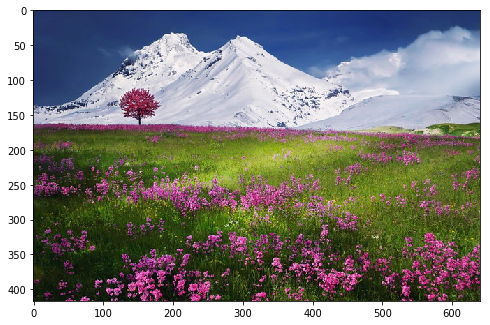

In [4]:
snow = img_as_float(io.imread('./images/pexels-snow.jpg'))

plt.figure(figsize=(8, 8))
plt.imshow(snow)

<b>Create random bit corruption in image</b> 

<b>ones_like</b> = array containing all 1's with exact shape and size of input image 

In [6]:
noise = np.ones_like(snow) * 0.4 * (snow.max() - snow.min())

noise[np.random.random(size=noise.shape) > 0.7] *= -1

### Function to calculate MSE

In [14]:
def mse(x, y):
    return np.linalg.norm(x - y)

#### Add noise and absolute noise

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


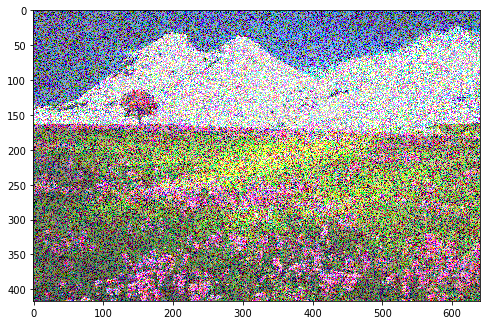

In [15]:
snow_noisy = snow + noise

plt.figure(figsize=(8, 8))
plt.imshow(snow_noisy)

<b>find the absolute value of noise for each pixel and then add it.</b>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


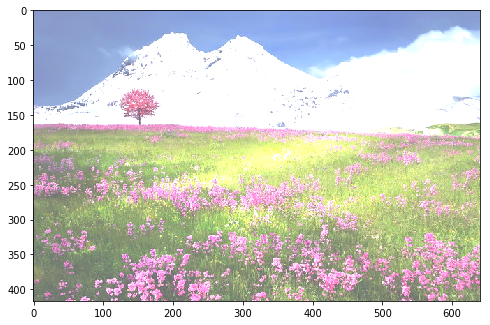

In [16]:
snow_noisy_constant = snow + abs(noise)

plt.figure(figsize=(8, 8))
plt.imshow(snow_noisy_constant)

#### Calculate MSE and SSIM (Structural Similarity Index Matrix) for each image paired with the original

* Lower values of MSE indicate that the images are more similar
* Higher values of SSIM indicate that the images are more similar

In [19]:
mse_none = mse(snow, snow)

ssim_none = ssim(snow, 
                 snow,
                 multichannel=True,
                 data_range = snow.max() - snow.min())

In [26]:
mse_noise = mse(snow, snow_noisy)

ssim_noise = ssim(snow, 
                  snow_noisy,
                  multichannel=True,
                  data_range = snow_noisy.max() - snow_noisy.min())

In [27]:
mse_constant = mse(snow, snow_noisy_constant)

ssim_constant = ssim(snow, 
                     snow_noisy_constant,
                     multichannel=True,
                     data_range = snow_noisy_constant.max() - snow_noisy_constant.min())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


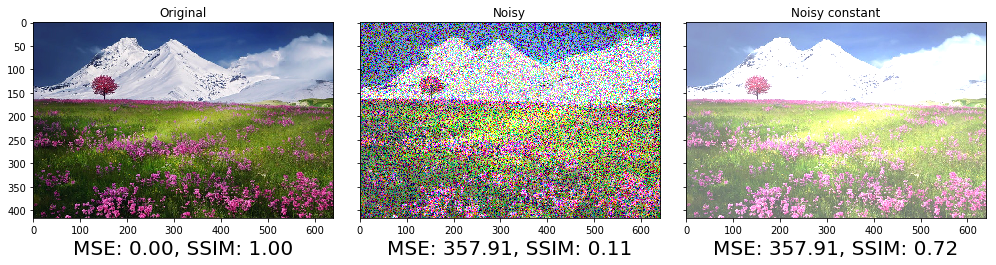

In [31]:
fig, axes = plt.subplots(1, 3, 
                         figsize=(14, 6),
                         sharex=True, sharey=True)
ax = axes.ravel()

label = 'MSE: {:.2f}, SSIM: {:.2f}'
ax[0].imshow(snow)
ax[0].set_xlabel(label.format(mse_none, ssim_none), fontsize=20)
ax[0].set_title('Original')

ax[1].imshow(snow_noisy)
ax[1].set_xlabel(label.format(mse_noise, ssim_noise), fontsize=20)
ax[1].set_title('Noisy')

ax[2].imshow(snow_noisy_constant)
ax[2].set_xlabel(label.format(mse_constant, ssim_constant), fontsize=20)
ax[2].set_title('Noisy constant')

plt.tight_layout()
plt.show()